# Step 1
### Import Data and Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data sets

path = r'C:\Users\pklet\OneDrive\09-2023 Instacart Basket Analysis Petar Kletnikoski'

In [3]:
#importing new dataset

high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [6]:
high_activity_customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer


# Step 5 
### Create a profiling variable based on age, income, certain goods

#### Age Groups

In [8]:
high_activity_customers.loc[high_activity_customers['age'] <= 29, 'age_group'] = '18-29'
high_activity_customers.loc[(high_activity_customers['age'] > 29) & (high_activity_customers['age'] < 40), 'age_group'] = '30-39'
high_activity_customers.loc[(high_activity_customers['age'] > 39) & (high_activity_customers['age'] < 50), 'age_group'] = '40-49'
high_activity_customers.loc[(high_activity_customers['age'] > 49) & (high_activity_customers['age'] < 60), 'age_group'] = '50-59'
high_activity_customers.loc[(high_activity_customers['age'] > 59) & (high_activity_customers['age'] < 70), 'age_group'] = '60-69'
high_activity_customers.loc[high_activity_customers['age'] > 69, 'age_group'] = '70 and over'

In [9]:
# Check totals

high_activity_customers['age_group'].value_counts(dropna = False)

18-29          5817603
70 and over    5812883
40-49          4883179
30-39          4847507
50-59          4841771
60-69          4761621
Name: age_group, dtype: int64

In [11]:
# Check head,
high_activity_customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,activity_flag,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49


### Income Groups

In [12]:
high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'
high_activity_customers.loc[(high_activity_customers['income'] > 75000) & (high_activity_customers['income'] <= 120000), 'income_group'] = 'Middle'
high_activity_customers.loc[high_activity_customers['income'] > 120000, 'income_group'] = 'Upper'

In [13]:
# Check totals

high_activity_customers['income_group'].value_counts(dropna = False)

Middle    11878317
Lower      9906734
Upper      9179513
Name: income_group, dtype: int64

In [14]:
# Check head

high_activity_customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,activity_flag,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49,Upper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49,Upper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49,Upper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49,Upper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity customer,40-49,Upper


In [15]:
high_activity_customers.shape

(30964564, 36)

In [16]:
# Importing department data\n

df_dep =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)


In [17]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
# Rename column
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [19]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
# Merging the departments dataframe with high_active_customers dataframe

df_merged = high_activity_customers.merge(df_dep, on = 'department_id')

In [22]:
# checking the merge result
df_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages
5,33890,7,beverages
6,33890,7,beverages
7,65803,7,beverages
8,65803,7,beverages
9,65803,7,beverages


### Dependents

In [24]:
# Creating flag for number of dependents in a household

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] ==0), 'customer_profile'] = 'Single adult'
df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] >0), 'customer_profile'] = 'Young parent'
df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] <=2), 'customer_profile'] = 'Family'
df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] >2), 'customer_profile'] = 'Big Family'

In [25]:
# Checking the results
df_merged[['fam_status', 'n_dependants', 'customer_profile']].head()

,fam_status,n_dependants,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,single,0,Single adult
4,single,0,Single adult


In [26]:
df_merged['customer_profile'].value_counts(dropna = False)

Family          14459664
Single adult     7739681
Big Family       7284047
Young parent     1481172
Name: customer_profile, dtype: int64

# Step 6 
### Create appropriate visualization to show the distribution of profiles

Text(0.5, 1.0, 'Distribution of Age Groups')

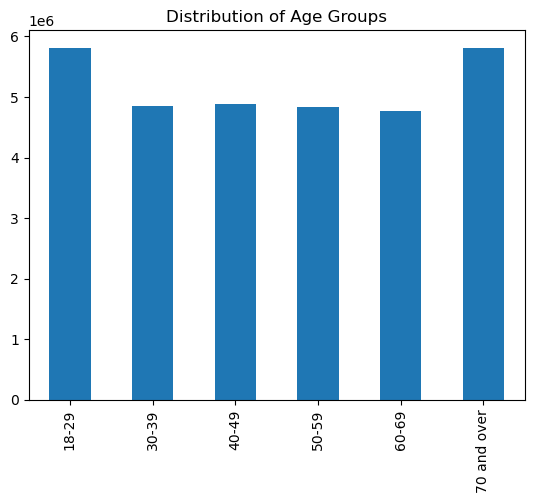

In [27]:
# Creating bar chart for 'age_category'
bar_age_group = df_merged['age_group'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [29]:
# Exporting bar chart

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

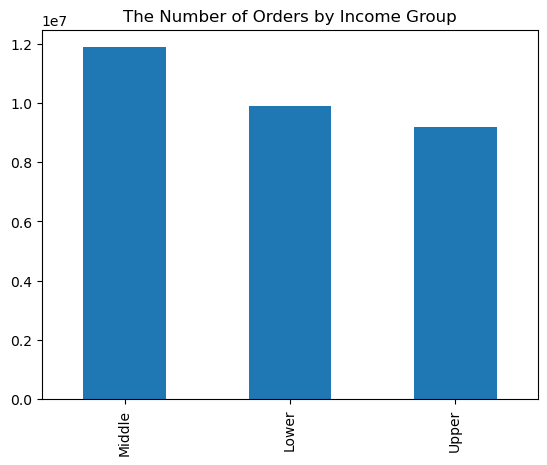

In [30]:
# Bar chart of income_group

bar_income_group = df_merged['income_group'].value_counts().plot.bar(title ='The Number of Orders by Income Group')

In [31]:
# Exporting bar chart

bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

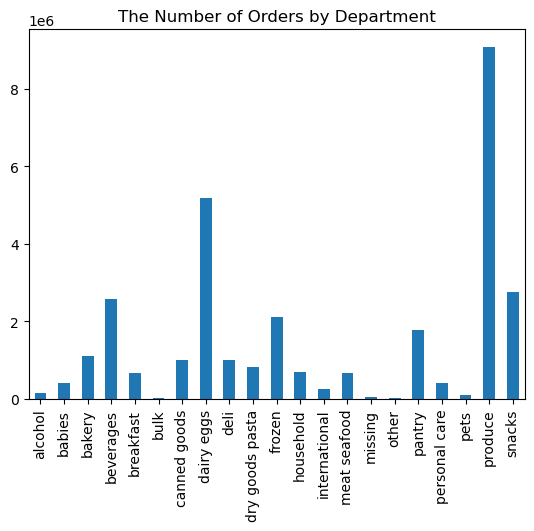

In [32]:
# Creating a bar chart for departments

bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [33]:
# Exporting bar chart

bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

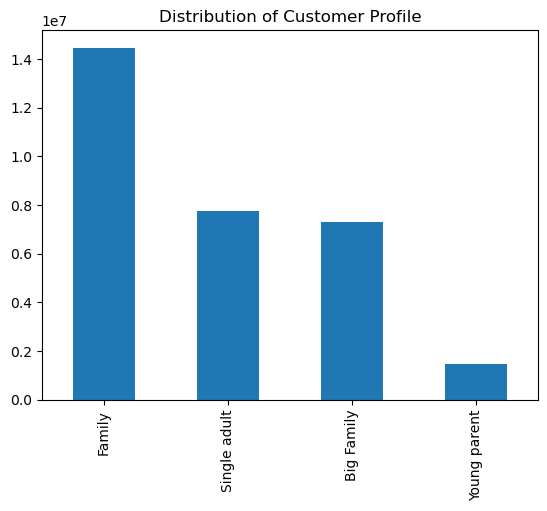

In [34]:
# Creating a bar chart for 'customer_profile'

bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [35]:
# Exporting bar chart

bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

#  Step 7 
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### Age Group of Customer

In [36]:
age_group_agg = df_merged.groupby('age_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [37]:
age_group_agg

days_since_last_order                  prices                
                              min   max       mean    min   max      mean
age_group                                                                
18-29                         0.0  30.0  10.815269    1.0  25.0  7.781341
30-39                         0.0  30.0  10.806490    1.0  25.0  7.787248
40-49                         0.0  30.0  10.796786    1.0  25.0  7.797370
50-59                         0.0  30.0  10.842821    1.0  25.0  7.784202
60-69                         0.0  30.0  10.791545    1.0  25.0  7.798808
70 and over                   0.0  30.0  10.808135    1.0  25.0  7.791199

#### Income group of Customer

In [39]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure

income_group_agg = df_merged.groupby('income_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [40]:
income_group_agg

days_since_last_order                  prices                
                               min   max       mean    min   max      mean
income_group                                                              
Lower                          0.0  30.0  10.901034    1.0  25.0  7.442172
Middle                         0.0  30.0  10.773662    1.0  25.0  7.956138
Upper                          0.0  30.0  10.759943    1.0  25.0  7.949650

#### Depandents

In [41]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [42]:
customer_profile_agg

days_since_last_order                  prices                
                                   min   max       mean    min   max      mean
customer_profile                                                              
Big Family                         0.0  30.0  10.825634    1.0  25.0  7.790069
Family                             0.0  30.0  10.818477    1.0  25.0  7.789117
Single adult                       0.0  30.0  10.791951    1.0  25.0  7.788800
Young parent                       0.0  30.0  10.750995    1.0  25.0  7.799897

#### Departments

In [44]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.

department_customer_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_last_order','prices']].agg(['min','max','mean'])

In [45]:
department_customer_profile_agg

days_since_last_order                  prices  \
                                                 min   max       mean    min   
customer_profile department                                                    
Big Family       alcohol                         0.0  30.0   9.872432    1.0   
                 babies                          0.0  30.0   9.612820    1.0   
                 bakery                          0.0  30.0  10.801945    1.0   
                 beverages                       0.0  30.0  10.813127    1.0   
                 breakfast                       0.0  30.0  11.041944    1.0   
...                                              ...   ...        ...    ...   
Young parent     pantry                          0.0  30.0  10.576674    1.0   
                 personal care                   0.0  30.0  11.313318    1.0   
                 pets                            0.0  30.0  11.389847    1.0   
                 produce                         0.0  30.0  10.569925    1.0   
                 snacks                          0.0  30.0  10.611435    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.260335  
                 babies         15.0  7.658709  
                 bakery         15.0  7.867693  
                 beverages      15.0  7.667362  
                 breakfast      14.9  8.012552  
...                              ...       ...  
Young parent     pantry         20.0  8.016946  
                 personal care  15.0  7.938132  
                 pets           15.0  7.918097  
                 produce        15.0  8.003058  
                 snacks          7.0  4.265732  

[84 rows x 6 columns]

#  Step 8 
### Compare customer profiles with regions and departments

In [46]:
# Checking the relationship of 'age_category' & 'income_class' of customers profile in differnet regions

profile_age_region = df_merged.groupby('region')[['income_group','age_group']].value_counts().reset_index(name='count')

In [47]:
profile_age_region

,region,income_group,age_group,count
0,Midwest,Lower,18-29,816759
1,Midwest,Lower,30-39,706053
2,Midwest,Upper,70 and over,617222
3,Midwest,Upper,50-59,543071
4,Midwest,Middle,70 and over,530343
...,...,...,...,...
67,West,Lower,70 and over,237717
68,West,Lower,50-59,205409
69,West,Lower,60-69,186329
70,West,Upper,18-29,16889


In [48]:
# Checking income_class by regions

region_income = pd.crosstab(df_merged['income_group'],df_merged['region'], dropna = False)

In [49]:
region_income

region,Midwest,Northeast,South,West
income_group,,,,
Lower,2300529,1730006,3313671,2562528
Middle,2772061,2105801,3974062,3026393
Upper,2188923,1628878,3023406,2338306


# Step 9 
### Produce suitable charts

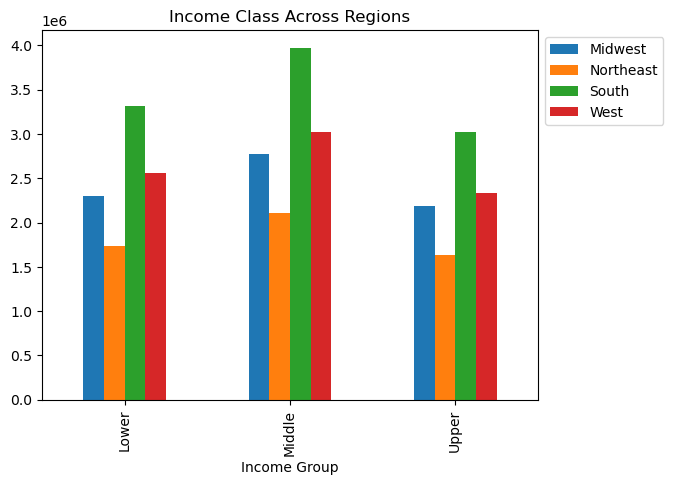

In [51]:
# Visualtization of 'income_class' and 'region
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [52]:
# Export bar chart

bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [53]:
# Piovt the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'

customer_family_department = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

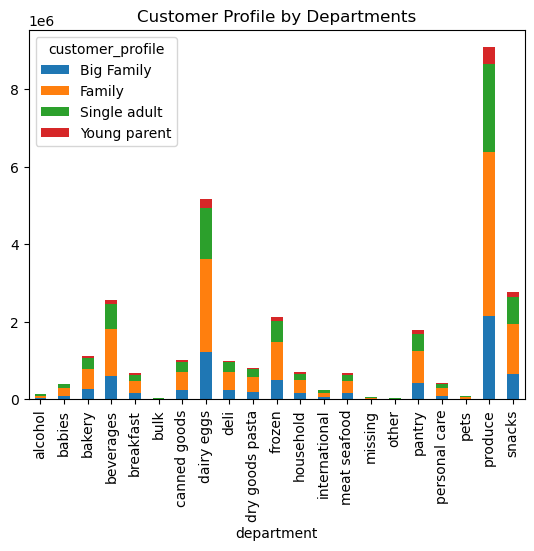

In [54]:
#stacked bar graph

stacked_family_department = customer_family_department.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [55]:
# Export stacked bar chart

stacked_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_family_department.png'))

In [56]:
# Create a crosstab to count the occurrences of age categories in each department

cross_tab_age_group = pd.crosstab(df_merged['department'], df_merged['age_group'])

<Figure size 1200x600 with 0 Axes>

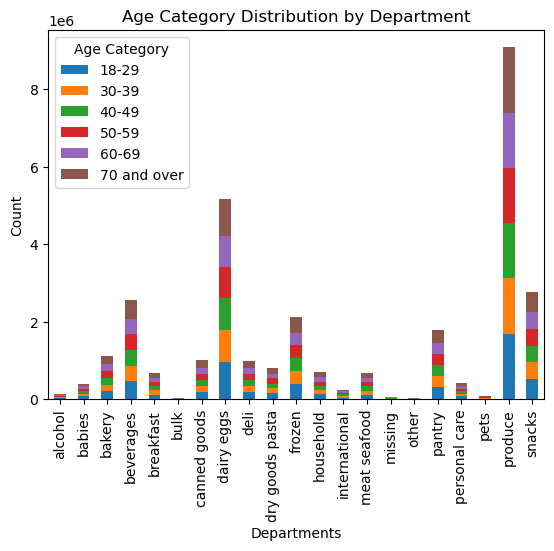

In [57]:
# Creating a clustered bar chart
plt.figure(figsize=(12, 6))
clustered_cross_tab_age_group = cross_tab_age_group.plot(kind='bar', stacked=True, title='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Category')

In [58]:
# Exporting clustered bar chart
clustered_cross_tab_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_cross_tab_age_group.png',))

In [59]:
# Checking customer_profile by region

customer_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [60]:
customer_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1671542,1291928,2425559,1895018
Family,3415720,2561845,4798190,3683909
Single adult,1822816,1354482,2581933,1980450
Young parent,351435,256430,505457,367850


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

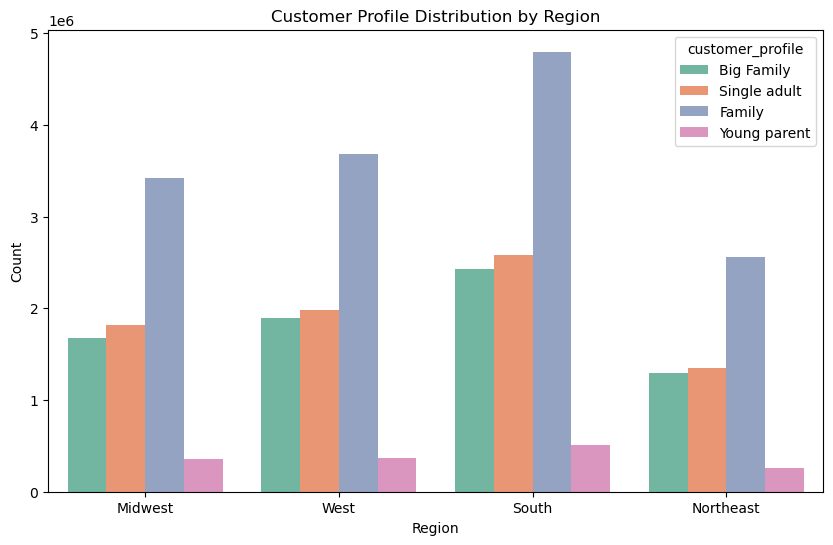

In [61]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_customer_by_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [63]:
# exporting Countplot bar chart

countplot_customer_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_customer_by_region.png'))

# Step 10 
### Export your final data set

In [64]:
# Exporting Dataframe.

df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_dept_merged.pkl'))